In [1]:
from LTSpice_Simulator import get_Spice_Arrays
from Wavefront_Generation import Full_Cycle, multiplicative_merge_single_cycle
import Wavefront_Plotting as WP
import Wavefront_Interactive as WI
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, EngFormatter)

%matplotlib widget

In [2]:
inputs = [
    {#1
        'C_time':'0.00000200',
        'L_time':'0.0000003125',
        'L_impedance':'800',
    },
    {#2
        'C_time':'0.00000200',
        'L_time':'0.000000625',
        'L_impedance':'400',
    },
    {#3
        'C_time':'0.00000200',
        'L_time':'0.000001',
        'L_impedance':'250',
    },
    {#4
        'C_time':'0.00000200',
        'L_time':'0.00000200',
        'L_impedance':'125',
    },
    {#5
        'C_time':'0.00000200',
        'L_time':'0.0000025',
        'L_impedance':'100',
    },
    {#6
        'C_time':'0.00000200',
        'L_time':'0.0000032',
        'L_impedance':'78.125',
    }
          ]

interfaces = []

for i,input_values in enumerate(inputs):
    print(f' Interface number {i+1}')
    interfaces.append(Full_Cycle(**input_values))

interface = interfaces[0]

LTSpice_outputs = get_Spice_Arrays(**interface.data_input.SPICE_input_values,Step_size=str(2*interface.data_input.GCD))
LTSpice_outputs_1 = get_Spice_Arrays(**interface.data_input.SPICE_input_values,Step_size=str(interface.data_input.GCD))
LTSpice_outputs_2 = get_Spice_Arrays(**interface.data_input.SPICE_input_values,Step_size=str(interface.data_input.GCD/2))
LTSpice_outputs_3 = get_Spice_Arrays(**interface.data_input.SPICE_input_values,Step_size=str(interface.data_input.GCD/4))

 Interface number 1

Information about this network : 


- The Inductor -
Inductor Inductance Per Length :        0.00012500000
Inductor Capacitance Per Length :       1.953125E-10
Inductor Length :                       1
Inductor Total Inductance :             0.00012500000
Inductor Total Capacitance :            1.953125E-10
Inductor Velocity :                     6.4E+6
Inductor One Way Time Delay :           1.5625E-7
Inductor Impedance :                    800

- The Capacitor -
Capacitor Inductance Per Length :       0.00000100
Capacitor Capacitance Per Length :      0.00000100
Capacitor Length :                      1
Capacitor Total Inductance :            0.00000100
Capacitor Total Capacitance :           0.00000100
Capacitor Velocity :                    1E+6
Capacitor One Way Time Delay :          0.00000100
Capacitor Impedance :                   1

- The Time -
Number Periods :                        1
Simulation Stop Time :                  0.0000702481473104118872600903

(0.0, 7.024814731041188e-05)

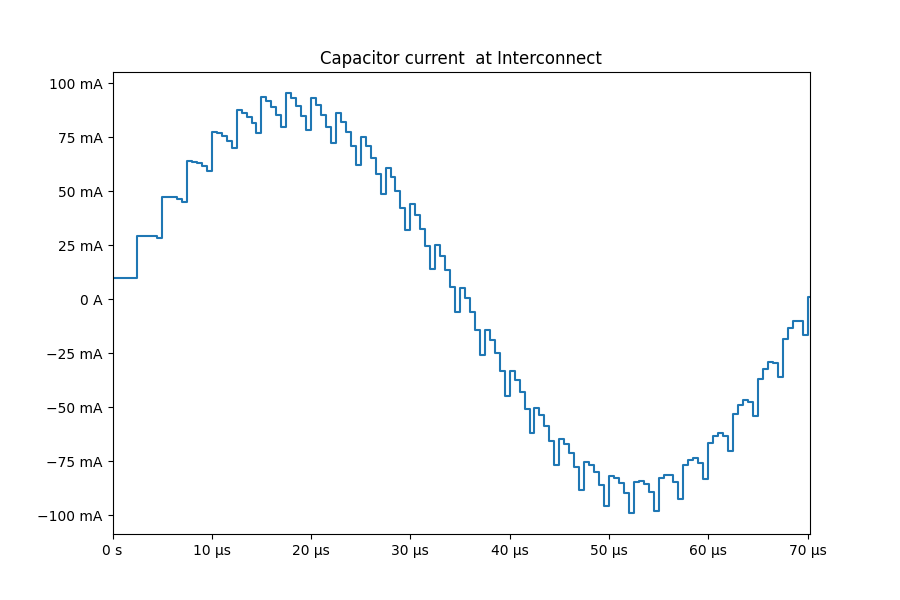

In [3]:
fig,ax = plt.subplots(figsize=(9,6))

# what_to_plot = 'Voltage Capacitor'
# ax.plot(LTSpice_outputs['Time'],LTSpice_outputs['Capacitor_Voltage_Circuit'],'k--')

# what_to_plot = 'Voltage Inductor'
# ax.plot(LTSpice_outputs['Time'],LTSpice_outputs['Inductor_Voltage_Circuit'],'k--')

what_to_plot = 'Current Capacitor'
# ax.plot(LTSpice_outputs['Time'],LTSpice_outputs['Capacitor_Current_Circuit'],'k--')

# for interface in interfaces:
#     WP.plot_time_interconnect(interface.data_output_ordered,ax,what_to_plot,True)

WP.plot_time_interconnect(interfaces[4].data_output_ordered,ax,what_to_plot,True)

ax.xaxis.set_major_formatter(EngFormatter('s'))
ax.set_xlim(0,interface.data_input.Simulation_Stop_Time)
# ax.set_xlim(0.000016,0.000019)
# ax.set_ylim(0.075,0.1)

# ax.axvline(0.00005225,color = 'r',linestyle='-.')
# ax.legend(['Lumped element solution', 'variation 1', 'variation 2', 'variation 3'], fontsize='large',loc='lower left')
# ax.legend(['Lumped element solution', 'variation 6'], fontsize='large')
# ax.legend(['Lumped element solution', 'variation 1', 'variation 2', 'variation 3', 'variation 5', 'variation 5','variation 6'], fontsize='large')


GridspecLayout(children=(Button(description='step backward', layout=Layout(grid_area='widget001', width='auto'…

FloatSlider(value=0.0, layout=Layout(width='auto'), max=1000.0, step=1.0)

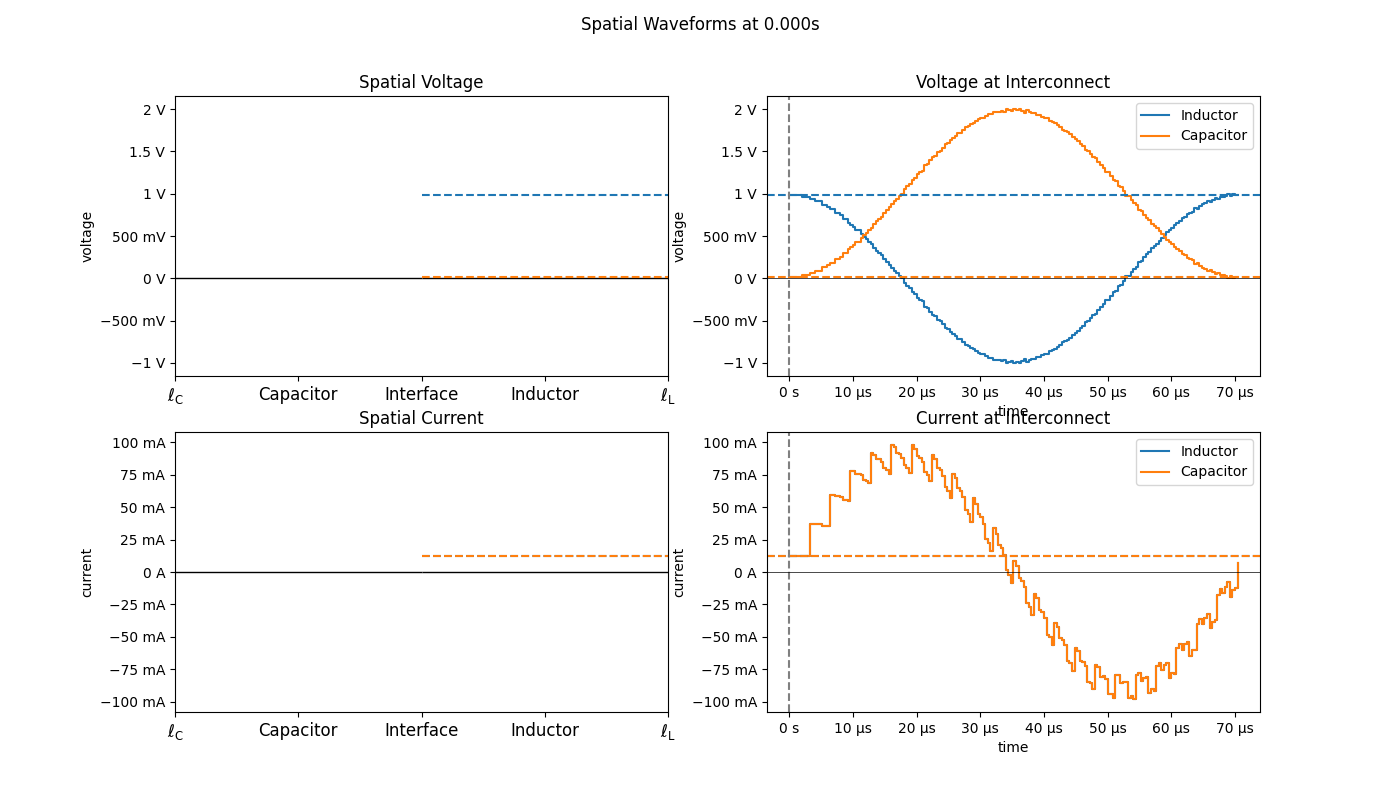

In [26]:
WI.spatial_interconnect_investigator_ui(interfaces[5])

In [5]:
import Wavefront_Misc as WM

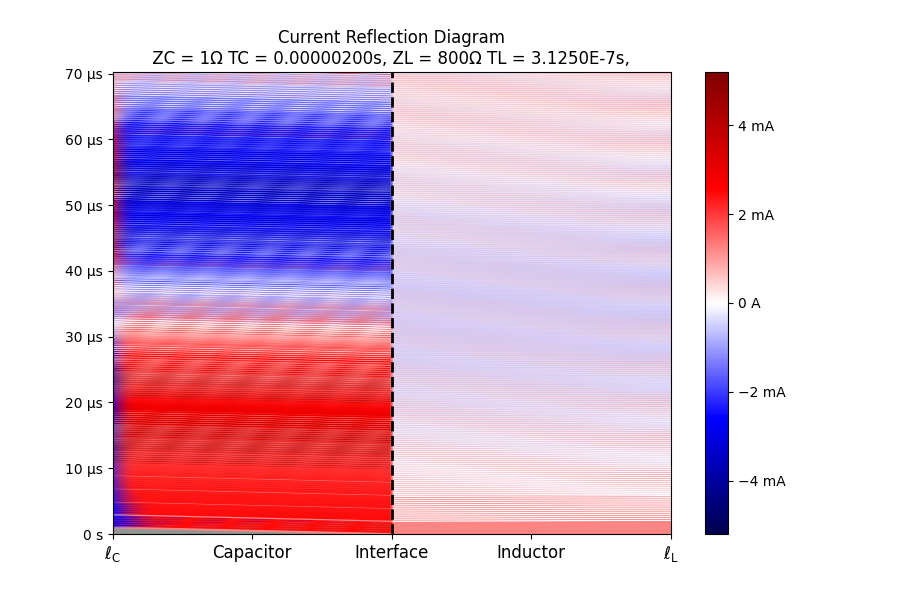

In [6]:
fig_ref,ax_ref = plt.subplots(figsize=(9,6))

# WP.plot_time_interconnect(interface.data_output_ordered,ax_ref,'current capacitor')
# ax_ref.set_xlim(0,287)
WP.plot_refelction_diagram(interfaces[0],ax_ref,False,)

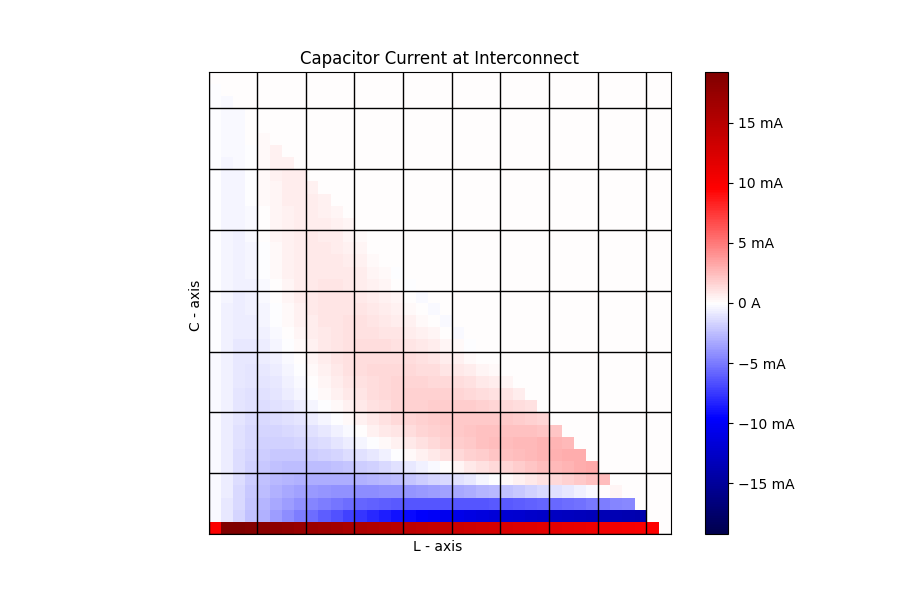

In [7]:
fig,ax = plt.subplots(figsize=(9,6))
array = interface.data_output_commutative.Voltage_Interconnect_Capacitor

interface_data = interfaces[4]
padding = 0

interface_output = interface_data.data_output_commutative
# interface_output = interface_data.data_output_multiplicative


# WP.plot_fanout_interconnect(interface_output,ax,'voltage Inductor')
# WP.plot_fanout_interconnect(interface_output,ax,'voltage capacitor',padding=padding)
WP.plot_fanout_interconnect(interface_output,ax,'current Capacitor')
# WP.plot_fanout_wavefronts(interface_data,ax,'Current Capacitor')
# WP.plot_fanout_interconnect(interface.data_output_multiplicative,ax,'Current Capacitor',custom_colour_bar_limits=(0.001,-0.001))

WP.plot_merging_lines_on_fanout(interface_output.Current_Interconnect_Capacitor
                                ,interface_data.data_input.Inductor_LCM_Factor
                                ,interface_data.data_input.Capacitor_LCM_Factor
                                ,ax
                                ,line_width=1
                                ,padding=padding)

# WP.plot_trace_on_merged_fanout_axis(interface_data,ax,'0.00001725',padding= padding)
# 

interactive(children=(FloatSlider(value=0.0, description='t', layout=Layout(width='auto'), max=1000.0, step=1.…

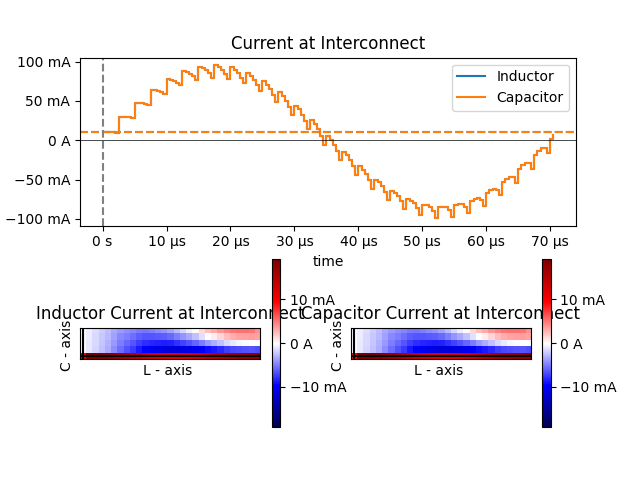

In [8]:
WI.interact_interconnect_time_and_fanout_path(interfaces[4],False,0)

In [9]:
max(interfaces[5].data_output_ordered.Voltage_Interconnect_Inductor)

Decimal('0.9873617693522906793048973144')

In [10]:
import numpy as np
from decimal import Decimal

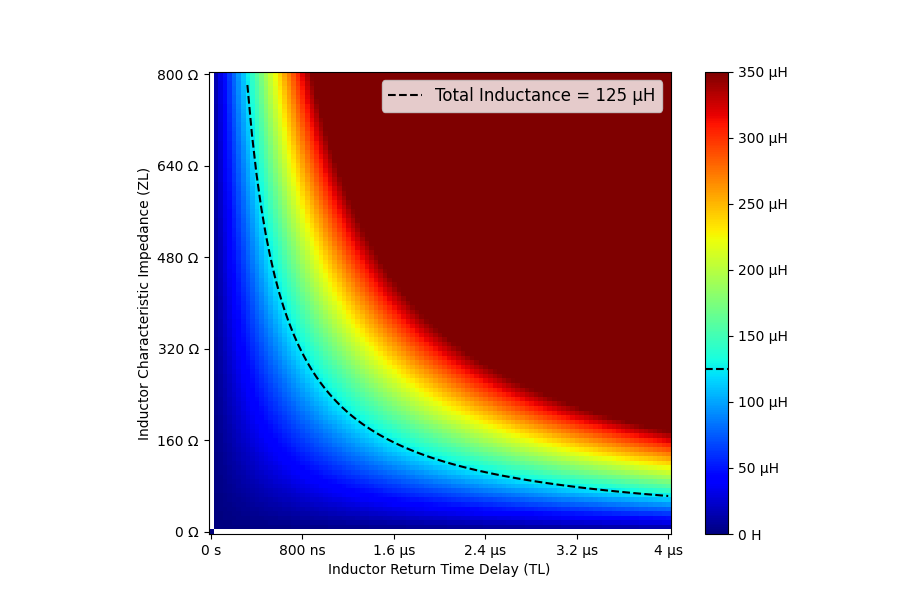

In [11]:
L_const = Decimal('0.000125')

ZL_y = np.linspace(0,1000,101)
TL_x = np.linspace(0,0.05e-6,101)

ZL_y = []
TL_x = []

ZL_y.append(Decimal('0'))
TL_x.append(Decimal('0'))

ZL_inc = Decimal('8')
TL_inc = Decimal('0.00000002')

x_plot = []
y_plot = []

for i in range(1,101):
    ZL_y.append(i*ZL_inc)
    TL_x.append(i*TL_inc)
    
    y_val = 1/(i*TL_inc)*L_const
    if(y_val < Decimal('800')):
        x_plot.append(i)
        y_plot.append(1/(i*TL_inc)*L_const/ZL_inc)
    # y_plot.append(1/(i*ZL_inc)*L_const)
    # x_plot.append(i)
L_tot = np.ndarray((101,101),dtype=Decimal)

for i in range (101):
    for j in range(101):
        L_tot[i,j] = TL_x[i]* ZL_y[j]
        # if L_tot[i,j] == L_const:
        #     x_plot.append(i)
        #     y_plot.append(j)
        
fig_z, ax_z = plt.subplots(figsize=(9,6))

WP.plot_fanout_time(L_tot,ax_z,show_ticks=True,custom_colour_bar_limits=(0,0.000350),units='H', title = '')

cb = ax_z.images[-1].colorbar 

cb.ax.axhline(0.000125,color='k',linestyle='--')
# ax_z.plot(TL_x[1:],y_plot)
ax_z.plot(x_plot,y_plot,'k--')

formatter = EngFormatter('s').format_eng

ax_z.set_xlabel('Inductor Return Time Delay (TL)')
ax_z.xaxis.set_major_formatter(lambda x,pos: formatter(2*x*float(TL_inc))+'s')

ax_z.set_ylabel('Inductor Characteristic Impedance (ZL)')
ax_z.yaxis.set_major_formatter(lambda x,pos: formatter(x*float(ZL_inc))+'Ω')

ax_z.legend(['Total Inductance = 125 µH'], fontsize='large')


In [12]:
# for i,interface in enumerate(interfaces):
#     WP.save_spatial_interconnect(interface,save_name = f"variation {i+1}")

In [13]:
# fig,ax = plt.subplots()
# array = interface.data_output_commutative.Voltage_Interconnect_Capacitor
array = array_merged

abs_max = WM.get_array_absolute_maximum(array)

# WP.plot_fanout_interconnect(interface.data_output_commutative,ax,'Voltage Capacitor')
# WP.plot_merging_lines_on_fanout(array,interface.data_input.Inductor_LCM_Factor,interface.data_input.Capacitor_LCM_Factor,ax)

fig_0S,ax_0S = plt.subplots()
fig_0T,ax_0T = plt.subplots()
fig_0L,ax_0L = plt.subplots()
stationary, translated = WM.split_and_translate_to_L_axis(array,interface.data_input.Capacitor_LCM_Factor)
L_translated = WM.translate_along_L_axis(translated,interface.data_input.Inductor_LCM_Factor)
WP.plot_fanout_magnitude(stationary,ax_0S,title='Stationary',units='V',custom_colour_bar_limits = (abs_max,-abs_max),show_colour_bar = False)
WP.plot_fanout_magnitude(translated,ax_0T,title='Translated',units='V',custom_colour_bar_limits = (abs_max,-abs_max),show_colour_bar = False)
WP.plot_fanout_magnitude(L_translated,ax_0L,title='L -Translated',units='V',custom_colour_bar_limits = (abs_max,-abs_max),show_colour_bar = False)


fig_1,ax_1 = plt.subplots()
array_merged = multiplicative_merge_single_cycle(array,interface.data_input.Inductor_LCM_Factor,interface.data_input.Capacitor_LCM_Factor)
WP.plot_fanout_magnitude(array_merged,ax_1,title='After first cycle',units='V')
WP.plot_merging_lines_on_fanout(array,interface.data_input.Inductor_LCM_Factor,interface.data_input.Capacitor_LCM_Factor,ax_1)
WP.plot_merging_lines_on_fanout(array,interface.data_input.Inductor_LCM_Factor,interface.data_input.Capacitor_LCM_Factor,ax_0S)
WP.plot_merging_lines_on_fanout(array,interface.data_input.Inductor_LCM_Factor,interface.data_input.Capacitor_LCM_Factor,ax_0T)
WP.plot_merging_lines_on_fanout(array,interface.data_input.Inductor_LCM_Factor,interface.data_input.Capacitor_LCM_Factor,ax_0L)

NameError: name 'array_merged' is not defined

In [ ]:
from decimal import Decimal
from matplotlib.ticker import (MultipleLocator, EngFormatter)

In [ ]:
Z = Decimal('50')
R = Decimal('1000')
RS = Decimal('20')
V = Decimal('1')

VO = V*(Z/(RS+Z))
IO = VO/Z

VO_lossless = V
IO_lossless = V/Z

Ref_Source = (RS-Z)/(RS + Z)
Ref_Source_lossless = Decimal('-1')
Ref_Load = (R-Z)/(R+Z)

number_K = 60
delta_T = Decimal('0.000000005')

VR = Decimal('0') 
IR = Decimal('0')
VR_lossless = Decimal('0') 
IR_lossless = Decimal('0')
T = Decimal('0')

V_out =[]
I_out =[]
V_out_lossless =[]
I_out_lossless =[]
T_out =[]

V_out.append(VR)
I_out.append(IR)
V_out_lossless.append(VR_lossless)
I_out_lossless.append(IR_lossless)
T_out.append(T)

for n in range(1,number_K):
    T+=delta_T
    
    VR_new = VO*Ref_Source**(n-1)*(Ref_Load**(n-1) + Ref_Load**(n))
    VR += VR_new
    
    IR_new = IO*Ref_Source**(n-1)*(Ref_Load**(n-1) - Ref_Load**(n))
    IR += IR_new
    
    VR_new_lossless = VO_lossless*Ref_Source_lossless**(n-1)*(Ref_Load**(n-1) + Ref_Load**(n))
    VR_lossless += VR_new_lossless
    
    IR_new_lossless = IO_lossless*Ref_Source_lossless**(n-1)*(Ref_Load**(n-1) - Ref_Load**(n))
    IR_lossless += IR_new_lossless
    
    V_out.append(VR)
    I_out.append(IR)
    V_out_lossless.append(VR_lossless)
    I_out_lossless.append(IR_lossless)
    T_out.append(T)
    
    # print(f"{n} : VR : {VR}")
    # print(f"{n} : IR : {IR}")

In [ ]:
# fig, ax = plt.subplots(1,2)
fig, ax = plt.subplots()

# ax[0].step(T_out,V_out,where='post')
ax.step(T_out,V_out_lossless,where='post')
ax.yaxis.set_major_formatter(EngFormatter('V'))
ax.xaxis.set_major_formatter(EngFormatter('s'))
ax.axhline(y = 1,linestyle='--',label='Circuit',c='orange')

ax.set_title("Voltage at load")
ax.legend(['distributed','lumped'])

# # ax[1].step(T_out,I_out,where='post')
# ax[1].step(T_out,I_out_lossless,where='post')
# ax[1].yaxis.set_major_formatter(EngFormatter('A'))
# ax[1].xaxis.set_major_formatter(EngFormatter('s'))

